# EXECUTIVE SUMMARY

**PROJECT ON MOVIE RATING PREDICTION**

Given a training dataset consisting information about user ratings for a  movie on a scale of 0 to 5. The training dataset contains four columns including userId, movieId, rating and timestamp along with another dataset containing information of movies like movieId, title and genres. The task is to predict the user ratings for movies for the given test dataset.



*   First, the datasets for train data, movies data and testing data were loaded. Then both the train and test dataset were combined for applying similar pre-processing steps.
*   Then, the combined train-test dataset were **merged with the movies dataset based on movieId column**.
*   The **list of genres of movies were extracted** from genres column by splitting and applied one hot encoding to convert the categorical data into a numerical data.
*   Then, the **year was extracted** when the review is given for the movie by user from the timestamp column and also extracted the year when the movie is released from the title column. After that, we **imputed the missing values of movie year by inserting the mode** value of that column. Also duration after which the review was given by the user have been extracted by taking the difference between timestamp year and movie release year.
*   Considering that both User ID and Movie ID are categorical variables. Subsequently, these categorical values underwent a transformation through the application of one-hot encoding for User ID and count encoding for Movie ID, facilitating their conversion into numerical values.
*   After the pre-processing and analysis of data, the following models were applied for predicting the ratings for movies provided by the users:

  1.   **Linear Regression Model :** Started with the simplest form of regressor technique to check how the preprocessed data works with test set.
  2.   **Ridge Regression Model :** Further to prevent overfit and adding a penalty to prevent model to fit noise ridge regressor was used.
  3.   **Random Forest :** Leveraging the ability to combine multiple decision trees to mitigate overfiting and provide better output led to the use of random forest whcich also check the handling of complex relationships.
  4.   **eXtreme Gradient Boosting model (XGBoost):** Same as random forest the XGBoost is an ensemble learning approach where each model learns over time and corrects the errors of its previous model.
  5.   **Stacking Model:** Combining the prediction capabilities of the previously used three models which are
  *  Random Forest
  *  XGBOOST
  *  Ridge Regression

By submitting the predicted values of user ratings for the given test dataset to the leaderboard and the score that we have got for test set RMSE can be seen in the following table:

| MODEL NAME | TEST RMSE |
|-------------|-----------|
|Linear Regression | 89 |
|Ridge Regression | 88 |
| Random Forest Regressor | 86 |
| XG Boostin  | 84 |
| **Stacked Boosting** | **82** |

**FINAL MODEL:**

**Stacked Regressor** was considered to be the best performing model of all the models where multiple strong predictors power was leveraged to obtain the final model which delivered the lowest RMSE **score of 82**.























# DATA PRE-PROCESSING

In [ ]:
###
# Import libraries
###

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Loading the dataset

In [ ]:
###
# Loading the training data, testing data and movies data
###
train_dataset = pd.read_csv('/content/drive/MyDrive/movie_rating_prediction/movie_ratings_train.csv')
test_dataset = pd.read_csv('/content/drive/MyDrive/movie_rating_prediction/movie_ratings_test.csv')
movies = pd.read_csv('/content/drive/MyDrive/movie_rating_prediction/movies.csv')

In [ ]:
### Displaying first few rows of training dataset
train_dataset.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
### Displaying first few rows of test dataset
test_dataset.head()

,userId,movieId,timestamp
0,1,349,964982563
1,1,592,964982271
2,1,780,964984086
3,1,1196,964981827
4,1,1208,964983250


In [ ]:
### Displaying first few movies data
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
###
# Combining training and test dataset for similar data pre-processing
###
combined_data = pd.concat([train_dataset,test_dataset], axis = 0)

#Dipalying combined data
combined_data

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
9995,610,81834,NaN,1493846730
9996,610,87232,NaN,1493845469
9997,610,91500,NaN,1493845427
9998,610,91658,NaN,1493845240


In [ ]:
###
# merging the previously combined data of train and test data with movies list data on basis of movieId
###

final_df = pd.merge(combined_data, movies, how = 'left', on = 'movieId')

#Dipalying final dataframe
final_df

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...,...
100831,610,81834,NaN,1493846730,Harry Potter and the Deathly Hallows: Part 1 (...,Action|Adventure|Fantasy|IMAX
100832,610,87232,NaN,1493845469,X-Men: First Class (2011),Action|Adventure|Sci-Fi|Thriller|War
100833,610,91500,NaN,1493845427,The Hunger Games (2012),Action|Adventure|Drama|Sci-Fi|Thriller
100834,610,91658,NaN,1493845240,"Girl with the Dragon Tattoo, The (2011)",Drama|Thriller


## ANALYSING THE DATA

In [ ]:
###
# Checking whether there are any missing values in the feature predictor columns in the final dataframe
###
final_df.drop('rating', axis = 1).isnull().sum()

userId       0
movieId      0
timestamp    0
title        0
genres       0
dtype: int64

In [ ]:
###
# Getting the list of genres applying splitting based on '|' symbol
###
genres = final_df['genres'].str.split("|")

#Displaying the unique list of genres
genres_list = set()
for genre in genres:
  genres_list = genres_list.union(set(genre))

genres_list

{'(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

In [ ]:
###
# Applying one hot encoding to genres column
###
encoded_genres = final_df['genres'].str.get_dummies("|")
#Dipalying one hot encoded genres
encoded_genres

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100831,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
100832,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0
100833,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0
100834,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


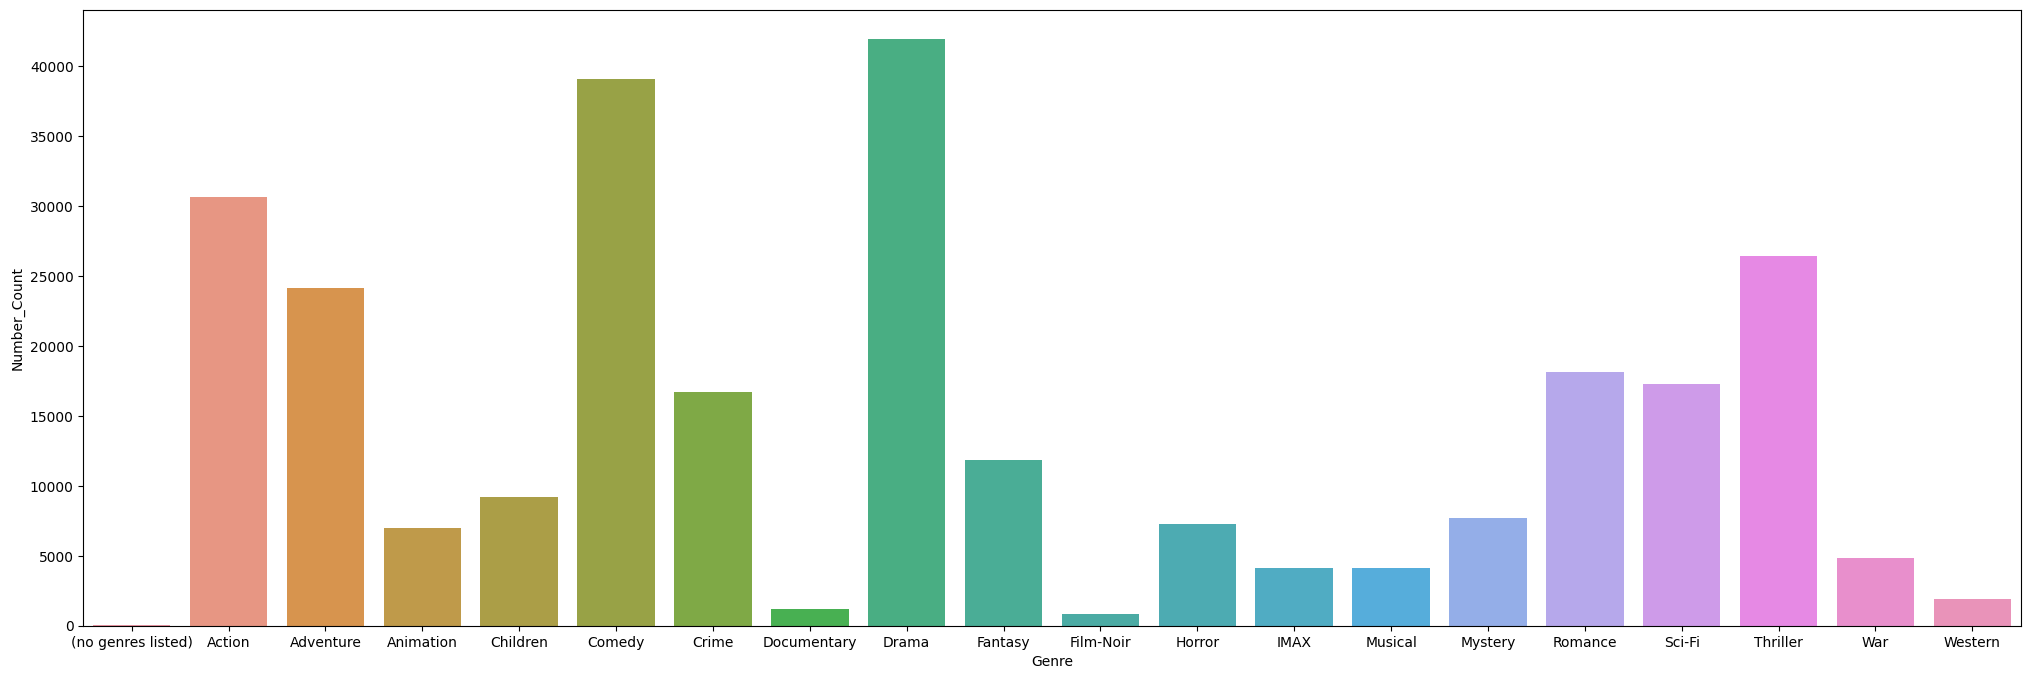

In [ ]:
## visualizing the count of different genres

genre_counts = encoded_genres.sum()

genre_count_df = pd.DataFrame({'Genre': genre_counts.index, 'Number_Count': genre_counts.values})

plt.figure(figsize= (25,8))
sns.barplot(data = genre_count_df, x= 'Genre', y='Number_Count')
plt.show()

In [ ]:
###
# Combining the dataframe with encoded genres
###

final_df = pd.concat([final_df, encoded_genres], axis = 1)

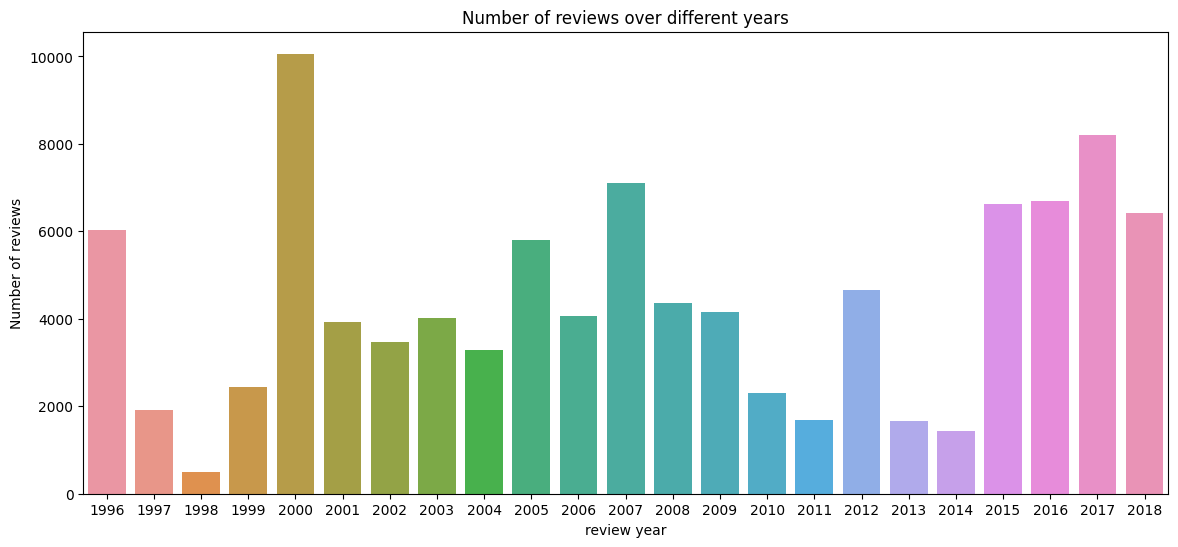

In [ ]:
###
# extracting the year when review is provided from timestamp
###

from datetime import datetime

##  Getting the review year from timestamp
final_df['review_year'] = final_df['timestamp'].apply(lambda x: datetime.utcfromtimestamp(x).strftime('%Y'))
# Convert into numeric value
final_df['review_year'] = pd.to_numeric(final_df.review_year)


## Plotting the number of reviews across different year
plt.figure(figsize =(14,6))
sns.countplot(x = 'review_year', data = final_df)
plt.title("Number of reviews over different years")
plt.xlabel('review year')
plt.ylabel("Number of reviews")
plt.show()



In [ ]:
###
# extracting the movie year when the movie is made frome movie title column
###
final_df['movie_year'] = final_df['title'].str.extract(r'\((\d{4})\)')


In [ ]:
## Displaying the unique movie years
unique_movie_years = final_df['movie_year'].unique()
unique_movie_years

array(['1995', '1996', '1994', '1977', '1993', '1990', '1991', '1940',
       '1939', '1941', '1938', '1947', '1975', '1968', '1945', '1963',
       '1971', '1951', '1979', '1992', '1986', '1982', '1989', '1987',
       '1981', '1983', '1960', '1980', '1952', '1984', '1933', '1985',
       '1974', '1922', '1997', '1998', '1930', '1942', '1967', '1959',
       '1946', '1978', '1973', '1988', '1999', '1976', '1931', '1964',
       '1962', '1965', '1969', '2000', '1970', '2003', '2004', '2006',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '1955', '2002', '1961', '1954', '1957', '1943', '1956', '1966',
       '2001', '1937', '1972', '2005', '1950', '2007', '2016', '1926',
       '1944', '1949', '1936', '2017', '1958', '1935', '1927', '1953',
       '2018', '1923', '1902', '1920', '1948', '1928', nan, '1934',
       '1916', '1908', '1932', '1921', '1925', '1929', '1917', '1915',
       '1924', '1903', '1919'], dtype=object)

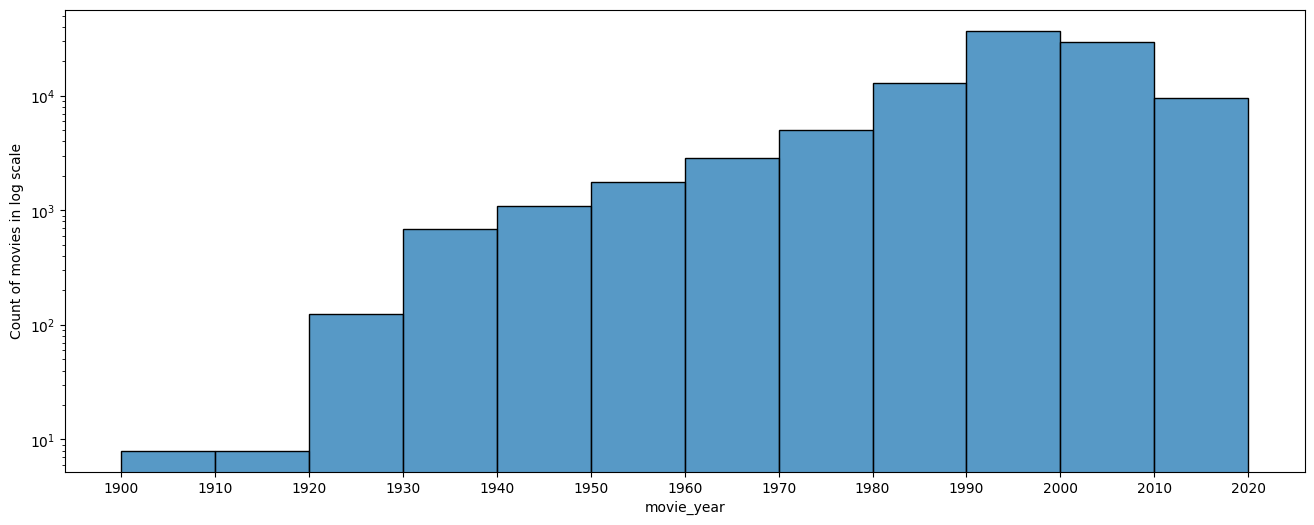

In [ ]:
###
# Displaying the count of movies in the span of 10 years from 1900 to 2020.
###

plt.figure(figsize=(16,6))
bar_plot = sns.histplot(pd.to_numeric(final_df['movie_year']), bins = range(1900,2030,10))
bar_plot.set_xticks(range(1900,2030,10))
bar_plot.set_xticklabels([str(year) for year in range(1900,2030,10)])
plt.yscale('log')
plt.ylabel('Count of movies in log scale')
plt.show()

In [ ]:
## Checking whether there are any nan(missing) values in movie years
final_df[final_df['movie_year'].isna()]

,userId,movieId,rating,timestamp,title,genres,(no genres listed),Action,Adventure,Animation,...,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,review_year,movie_year
8162,62,176601,5.0,1525795252,Black Mirror,(no genres listed),1,0,0,0,...,0,0,0,0,0,0,0,0,2018,NaN
15073,105,147250,5.0,1526207354,The Adventures of Sherlock Holmes and Doctor W...,(no genres listed),1,0,0,0,...,0,0,0,0,0,0,0,0,2018,NaN
15100,105,171749,5.0,1526207365,Death Note: Desu nôto (2006–2007),(no genres listed),1,0,0,0,...,0,0,0,0,0,0,0,0,2018,NaN
16005,111,171631,1.0,1517440909,Maria Bamford: Old Baby,(no genres listed),1,0,0,0,...,0,0,0,0,0,0,0,0,2018,NaN
16007,111,171891,3.5,1517440199,Generation Iron 2,(no genres listed),1,0,0,0,...,0,0,0,0,0,0,0,0,2018,NaN
26865,209,140956,3.5,1524522239,Ready Player One,Action|Sci-Fi|Thriller,0,1,0,0,...,0,0,0,0,1,1,0,0,2018,NaN
26912,210,40697,4.0,1527266191,Babylon 5,Sci-Fi,0,0,0,0,...,0,0,0,0,1,0,0,0,2018,NaN
41678,305,140956,4.5,1533043577,Ready Player One,Action|Sci-Fi|Thriller,0,1,0,0,...,0,0,0,0,1,1,0,0,2018,NaN
41791,306,149334,3.0,1518380372,Nocturnal Animals,Drama|Thriller,0,0,0,0,...,0,0,0,0,0,1,0,0,2018,NaN
44661,318,171495,5.0,1516826406,Cosmos,(no genres listed),1,0,0,0,...,0,0,0,0,0,0,0,0,2018,NaN


In [ ]:
###
# Imputing the NaN values of movie year with mode value
###

## compute the mode value of the movie year
movie_year_mode_value = final_df['movie_year'].mode().iloc[0]

## imputing the missing values of movie year by the mode value
final_df['movie_year'] = final_df['movie_year'].fillna(movie_year_mode_value)

In [ ]:
## Rechecking is there any null values in movie year
final_df['movie_year'].isna().sum()

0

In [ ]:
## Getting the difference of years between the year when the movie is made and the year when review is provided
final_df['year_difference'] = final_df['review_year'] - pd.to_numeric(final_df['movie_year'])
final_df

,userId,movieId,rating,timestamp,title,genres,(no genres listed),Action,Adventure,Animation,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,review_year,movie_year,year_difference
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,...,0,0,0,0,0,0,0,2000,1995,5
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,...,0,0,1,0,0,0,0,2000,1995,5
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller,0,1,0,0,...,0,0,0,0,1,0,0,2000,1995,5
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,0,0,0,0,...,0,1,0,0,1,0,0,2000,1995,5
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,0,0,0,0,...,0,1,0,0,1,0,0,2000,1995,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100831,610,81834,NaN,1493846730,Harry Potter and the Deathly Hallows: Part 1 (...,Action|Adventure|Fantasy|IMAX,0,1,1,0,...,0,0,0,0,0,0,0,2017,2010,7
100832,610,87232,NaN,1493845469,X-Men: First Class (2011),Action|Adventure|Sci-Fi|Thriller|War,0,1,1,0,...,0,0,0,1,1,1,0,2017,2011,6
100833,610,91500,NaN,1493845427,The Hunger Games (2012),Action|Adventure|Drama|Sci-Fi|Thriller,0,1,1,0,...,0,0,0,1,1,0,0,2017,2012,5
100834,610,91658,NaN,1493845240,"Girl with the Dragon Tattoo, The (2011)",Drama|Thriller,0,0,0,0,...,0,0,0,0,1,0,0,2017,2011,6


In [ ]:
###
# Applying one hot encoding to movie year
###
final_df = pd.get_dummies(final_df, columns = ['movie_year'])

In [ ]:
###
# Displaying top 20 movies that have highest number count of user ratings
###

top_rating_count_movies = final_df.groupby('title').size().sort_values(ascending = False) [ :25]
top_rating_count_movies

title
Forrest Gump (1994)                                                               329
Shawshank Redemption, The (1994)                                                  317
Pulp Fiction (1994)                                                               307
Silence of the Lambs, The (1991)                                                  279
Matrix, The (1999)                                                                278
Star Wars: Episode IV - A New Hope (1977)                                         251
Jurassic Park (1993)                                                              238
Braveheart (1995)                                                                 237
Terminator 2: Judgment Day (1991)                                                 224
Schindler's List (1993)                                                           220
Fight Club (1999)                                                                 218
Toy Story (1995)                                

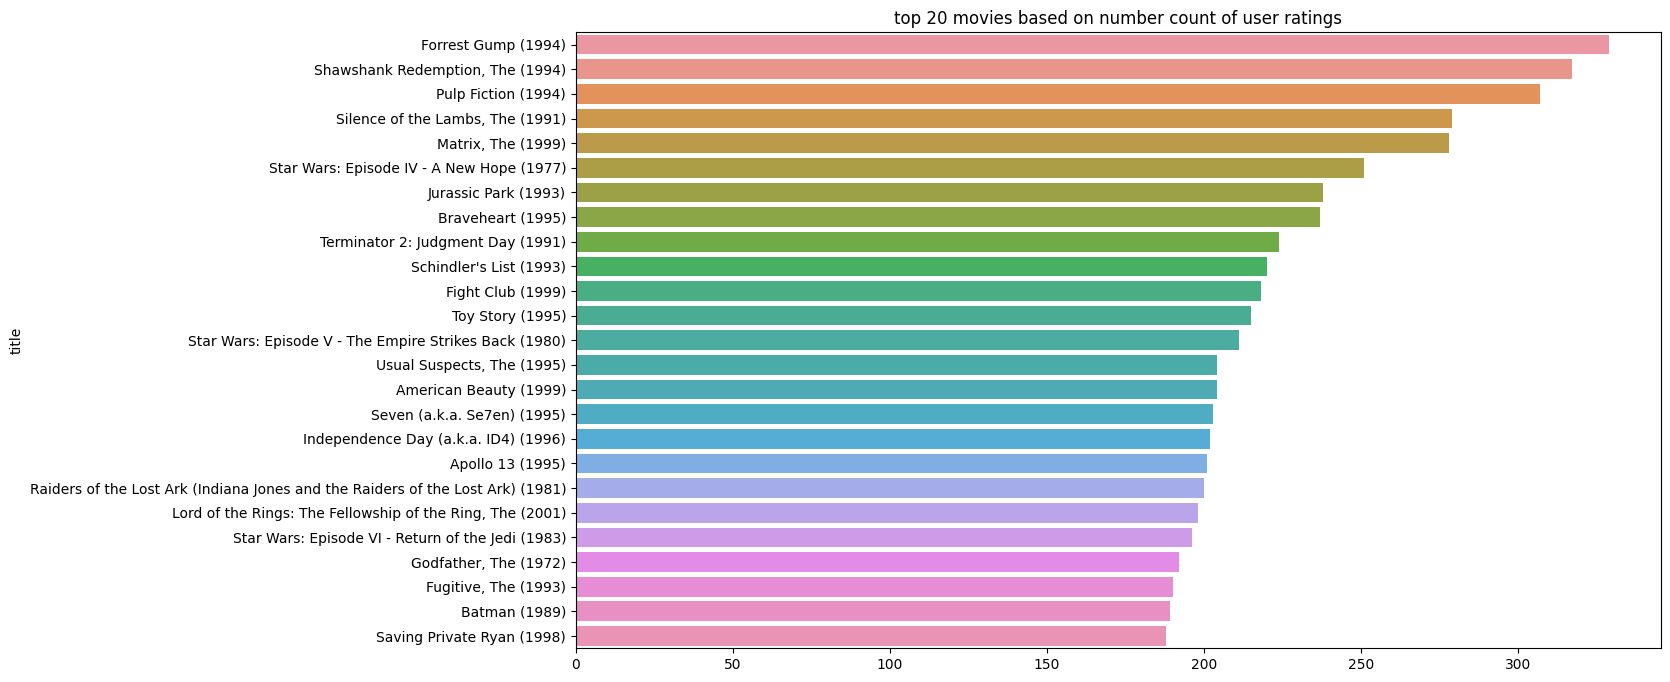

In [ ]:
# visualizing
plt.figure(figsize =(14,8))
sns.barplot(x = top_rating_count_movies.values, y= top_rating_count_movies.index)
plt.title('top 20 movies based on number count of user ratings')
plt.show()

In [ ]:
## Applying count encoding for movieId
final_df['movie_id_count'] = final_df.groupby('movieId')['rating'].transform('count')

In [ ]:
# Removing some features from the data frame
final_df = final_df.drop(['title','genres','review_year','movieId'], axis =1 )

In [ ]:
## Appy one hot encoding for userId
final_df = pd.get_dummies(final_df, columns = ['userId'])

In [ ]:
###
# Splitting the dataframe into train and test dataset
###

train_df_size = len(train_dataset)
train_df = final_df[0 : train_df_size]
test_df = final_df[train_df_size : ]

In [ ]:
###
# count of each unique of ratings
###
train_df['rating'].value_counts()

4.0    23912
3.0    18212
3.5    11888
5.0    11575
4.5     7531
2.0     7035
2.5     5089
1.0     2621
1.5     1696
0.5     1277
Name: rating, dtype: int64

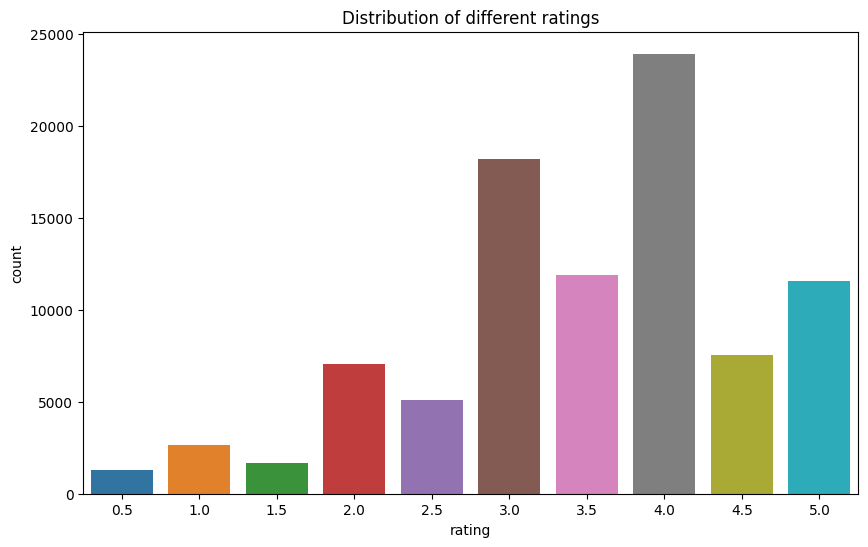

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot( x= 'rating', data = train_df)
plt.title("Distribution of different ratings")
plt.show()

In [ ]:
## dropping the rating column from test dataset
test_df = test_df.drop('rating', axis = 1)

In [ ]:
## dropping the rating column to get the feature columns for train dataset
X = train_df.drop('rating', axis = 1)

# target column
y = train_df['rating']


# DATA MODELLING AND EXECUTION

## Linear Regression

Linear regression is a simple and widely used regresion technique which assumes a linear relationship of the target variable(i.e.: Rating) with the other independent variables.

TEST RMSE = 89

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


#Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 32)

model = LinearRegression()
# Train the linear model
model.fit(X_train, y_train)

# predictions on the testing set
predictions = model.predict(X_test)

# Get the mean squared error on the test set to evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.864396047034594


In [ ]:
###
# Defining a function that actually rounds a number to  the nearest half
# [ e.g., 2.67 will be rounded to 2.5]
###

def round_number_to_nearest_half(number):
  return round(number * 2) /2

# make predictions on the test dataset
test_dataset_predictions = model.predict(test_df)

# get a list of predictions where predictions are rounded upto one decimal point
prediction_list = test_dataset_predictions.round(1).tolist()

# rounding the predictions to nearest half
rounded_prediction = list(map(round_number_to_nearest_half, prediction_list))

# Displaying the prediction
print(rounded_prediction)

[4.5, 4.5, 4.5, 5.0, 5.0, 4.5, 4.5, 4.5, 4.5, 4.0, 5.0, 4.5, 4.5, 4.5, 5.0, 4.5, 4.0, 4.5, 4.0, 4.0, 5.0, 4.0, 4.0, 4.5, 4.0, 4.0, 3.5, 3.5, 4.0, 4.0, 3.5, 3.5, 3.5, 4.0, 4.0, 3.5, 3.5, 3.5, 3.5, 4.0, 3.5, 3.5, 4.0, 4.0, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 4.0, 3.5, 3.5, 3.5, 3.5, 4.5, 3.5, 4.0, 4.0, 3.5, 3.5, 3.5, 3.5, 3.5, 4.0, 4.0, 3.5, 3.5, 4.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.0, 3.5, 3.5, 3.5, 4.0, 4.0, 4.0, 3.0, 3.5, 3.0, 3.5, 3.5, 3.5, 3.5, 3.0, 3.0, 3.5, 3.0, 3.0, 3.5, 4.0, 4.0, 3.5, 3.5, 4.5, 4.5, 4.5, 3.5, 4.0, 3.5, 3.5, 4.0, 4.0, 4.0, 3.0, 4.0, 3.5, 3.5, 4.0, 4.0, 3.5, 3.5, 3.0, 3.5, 3.0, 3.5, 3.5, 3.0, 3.5, 3.5, 3.5, 3.5, 4.0, 3.5, 3.5, 3.5, 4.0, 4.0, 4.0, 4.5, 3.0, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.0, 4.0, 3.5, 3.0, 3.5, 3.5, 3.5, 3.5, 4.0, 3.5, 3.0, 3.5, 3.5, 3.0, 3.0, 4.0, 4.0, 4.5, 4.0, 3.0, 3.0, 4.0, 4.0, 4.0, 4.0, 3.5, 3.5, 3.5, 4.0, 4.0, 4.0, 4.0, 4.5, 4.0, 4.0, 4.5, 4.5, 4.0, 4.0, 4.0, 4.5, 4.0, 4.5, 3.5, 4.0, 4.5, 4.5, 4.0, 4.0, 3.5, 4.5, 3.5, 3.5, 3.5,

## Ridge Regression

* Ridge Regression transforms the objective funtion by **introducing a penalty term** which is calculated by regularization parameter(alpha) multiplied by the sum of the squared coefficients.
* **Grid Seearch CV** being a hyperparameter tuning technique **helped to find the most optimal set of parameter** of all the predefined set of hyperparameter values(i.e.: alpha in this case) by constructing and evaluating all possible combinations.
* Also the cross validation of 5 helped to asses the performance of each combination more robustly.

TEST RMSE = 88

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Split the data into train and test dataset
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size= 0.2, random_state = 24)

# Setting a range of values for alpha (regularization hyperparameter)
alpha_values = np.logspace(-1,1)

# setting the parameter grid
param_grid = {'alpha' : alpha_values}

# ridge regreesion model
ridge_model = Ridge()

# By using cross validation to perform a grid search
grid_search_cv = GridSearchCV(ridge_model, param_grid, cv = 5, scoring = 'neg_mean_squared_error')
grid_search_cv.fit(X_train, y_train)

# Get the best alpha (hyperparamete)
best_alpha_val = grid_search_cv.best_params_['alpha']

# Train the ridge model with the optimal alpha (hyperparamter)
ridge_regression_model = Ridge(alpha = best_alpha_val)
ridge_regression_model.fit(X_train, y_train)

# predictions on the testing set
predictions = ridge_regression_model.predict(X_test)

# Get the mean squared error on the test set to evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.39804e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.40069e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.41121e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.4141e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning

Mean Squared Error: 0.8195044290676572


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.44509e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [ ]:
# make predictions on the test dataset
test_dataset_predictions = ridge_regression_model.predict(test_df)

# get a list of predictions where predictions are rounded upto one decimal point
prediction_list = test_dataset_predictions.round(1).tolist()

# rounding the predictions to nearest half
rounded_prediction = list(map(round_number_to_nearest_half, prediction_list))

# Displaying the prediction
print(rounded_prediction)

[4.5, 4.5, 4.5, 5.0, 5.0, 4.5, 4.5, 4.5, 4.5, 4.0, 4.5, 4.5, 4.5, 4.5, 5.0, 4.5, 4.0, 4.5, 4.0, 4.0, 5.0, 4.0, 4.0, 4.5, 3.5, 4.0, 3.5, 3.5, 4.0, 4.0, 3.5, 3.5, 3.5, 4.0, 4.0, 3.5, 3.5, 3.5, 3.5, 4.0, 3.5, 3.5, 4.0, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 4.0, 3.5, 3.5, 3.5, 3.5, 4.5, 3.5, 4.0, 4.0, 3.5, 3.5, 3.5, 3.5, 3.5, 4.0, 4.0, 3.5, 3.5, 4.5, 3.5, 3.5, 4.0, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 4.0, 4.0, 4.0, 3.0, 3.5, 3.0, 3.5, 3.5, 3.5, 3.5, 2.5, 3.0, 3.5, 3.0, 3.0, 3.5, 4.0, 4.0, 3.5, 3.5, 4.5, 4.5, 4.5, 3.5, 4.0, 3.5, 3.0, 4.0, 3.5, 4.0, 3.5, 4.5, 4.0, 3.5, 4.0, 4.0, 3.5, 3.5, 3.5, 4.0, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 4.0, 3.5, 3.0, 3.5, 4.0, 4.0, 4.0, 4.5, 3.0, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.0, 4.0, 3.5, 3.0, 3.5, 3.5, 3.5, 3.5, 4.0, 3.5, 3.0, 3.5, 3.5, 3.0, 3.0, 4.0, 4.0, 4.5, 4.0, 3.0, 3.0, 4.0, 4.0, 4.0, 4.0, 3.5, 3.5, 3.5, 4.0, 4.0, 4.0, 4.5, 4.5, 4.0, 4.0, 4.5, 4.5, 4.0, 4.0, 4.0, 4.5, 4.0, 4.5, 3.5, 4.0, 4.5, 4.5, 4.0, 4.0, 3.5, 4.5, 3.5, 3.5, 3.5,

## Random Forest

Random forest model is an ensemble learning model where the model makes predictions by combining the predictions made from several decision trees. Here, We have obtained the predictions from random forest regression  model by averaging the predictions made from 100 individual decision trees.

TEST RMSE = 86

In [ ]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Split the data into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.1, random_state = 42)



In [ ]:
## A random forest regressor ( an ensemble learning algorithm) with 100 trees
random_forest_reg = RandomForestRegressor(n_estimators= 100)

# Train the model
random_forest_reg.fit(X_train, y_train)

# predictions on the testing set
predictions = random_forest_reg.predict(X_test)

# Get the mean squared error on the test set to evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.740868728737884


In [ ]:
# make predictions on the test dataset
test_dataset_predictions = random_forest_reg.predict(test_df)

# get a list of predictions where predictions are rounded upto one decimal point
prediction_list = test_dataset_predictions.round(1).tolist()

# rounding the predictions to nearest half
rounded_prediction = list(map(round_number_to_nearest_half, prediction_list))

# Displaying the prediction
print(rounded_prediction)

[4.0, 3.0, 3.0, 5.0, 5.0, 4.5, 4.5, 4.5, 4.0, 4.0, 4.0, 4.5, 3.5, 4.0, 4.5, 4.0, 3.5, 3.5, 4.5, 4.0, 4.5, 3.5, 4.0, 4.5, 4.0, 3.5, 4.0, 3.0, 4.0, 4.5, 4.0, 4.0, 5.0, 4.0, 4.0, 3.0, 4.0, 3.5, 4.0, 4.5, 3.5, 3.5, 4.5, 3.0, 3.5, 3.0, 4.0, 3.5, 3.5, 3.5, 4.5, 3.0, 4.0, 4.0, 3.0, 3.5, 3.0, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.0, 3.5, 3.5, 3.0, 4.0, 3.5, 4.0, 2.5, 3.5, 3.0, 3.5, 4.0, 3.5, 3.5, 3.5, 3.5, 3.5, 3.0, 3.0, 4.0, 3.5, 3.5, 4.0, 3.0, 4.0, 2.5, 4.0, 3.5, 4.5, 4.5, 2.5, 3.0, 4.0, 3.5, 3.0, 3.5, 3.5, 3.5, 3.0, 3.0, 4.5, 5.0, 4.5, 4.0, 4.0, 3.0, 3.0, 4.0, 3.0, 4.5, 4.5, 4.0, 3.5, 3.5, 4.0, 4.0, 3.5, 4.0, 3.5, 3.0, 3.5, 4.0, 3.0, 3.0, 4.0, 4.0, 4.0, 3.5, 4.0, 3.5, 4.0, 4.0, 4.0, 4.0, 4.0, 4.5, 3.0, 4.5, 3.5, 2.5, 3.5, 3.0, 4.5, 2.5, 4.5, 3.0, 3.5, 4.0, 4.0, 3.5, 3.5, 4.0, 3.5, 3.5, 4.0, 4.0, 4.0, 3.5, 4.0, 4.0, 4.0, 3.5, 3.5, 3.5, 4.5, 4.5, 4.0, 4.5, 3.5, 4.5, 4.5, 4.0, 4.0, 4.5, 4.0, 4.5, 4.0, 3.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.0, 4.0, 4.0, 3.5, 4.0, 4.5, 4.5, 4.0, 4.0, 3.5, 4.0, 4.0, 4.0, 4.0,

# eXtreme Gradient Boosting (XGBoost)

XGBoost is an ensemble learning approach where each model learns over time and corrects the errors of its previous model.
* We have trained a XGBoost regression model by declaring the objective as to minimize the mean squared error.
* By starting with a simple prediction model and by computing error from the differences between predcitions and actual values, the gradient boosting approach aims to build a new model by correcting the mistakes of the previous model.
* This learning process is repeated iteratively with a goal to minimize the errors.

TEST RMSE = 84

In [ ]:
import xgboost as xgb

# Split the data into train and test dataset
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size= 0.2, random_state = 42)

# train XGboost model
xgb_model = xgb.XGBRegressor(
    objective = 'reg:squarederror',
    n_estimators = 1000,
    learning_rate =0.1,
    random_state =42
)
xgb_model.fit(X_train, y_train)

# predictions on the testing set
predictions = xgb_model.predict(X_test)

# Get the mean squared error on the test set to evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.7037679539392746


In [ ]:
# make predictions on the test dataset
test_dataset_predictions = xgb_model.predict(test_df)

# get a list of predictions where predictions are rounded upto one decimal point
prediction_list = test_dataset_predictions.round(1).tolist()

# rounding the predictions to nearest half
rounded_prediction = list(map(round_number_to_nearest_half, prediction_list))

# Displaying the prediction
print(rounded_prediction)

[4.0, 4.5, 4.0, 5.0, 5.0, 3.5, 4.5, 4.5, 4.0, 4.5, 4.5, 5.0, 4.5, 4.5, 5.0, 4.5, 3.0, 4.5, 4.5, 4.5, 4.5, 3.5, 4.5, 4.5, 4.0, 3.5, 3.0, 3.0, 3.5, 4.5, 4.0, 4.0, 4.5, 4.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 4.0, 4.5, 3.5, 3.5, 3.0, 3.5, 3.5, 3.5, 3.5, 4.0, 3.5, 3.5, 3.5, 3.0, 3.5, 3.0, 4.0, 4.0, 3.5, 3.5, 3.5, 4.0, 3.0, 3.5, 3.5, 3.5, 3.5, 4.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 4.0, 3.5, 3.0, 3.5, 4.0, 4.0, 3.5, 3.5, 4.5, 2.0, 4.0, 3.5, 3.5, 4.0, 2.5, 3.0, 3.5, 2.5, 3.0, 3.5, 4.0, 4.0, 3.0, 3.5, 4.0, 4.0, 4.0, 3.5, 3.5, 3.0, 3.0, 4.0, 3.5, 5.0, 4.0, 2.5, 2.0, 3.0, 3.0, 1.5, 3.5, 3.5, 3.5, 3.0, 4.0, 4.0, 4.0, 3.5, 4.0, 4.0, 3.5, 4.0, 3.5, 3.5, 3.5, 4.0, 4.5, 3.5, 4.0, 4.5, 2.5, 4.5, 3.0, 2.5, 3.5, 2.5, 4.0, 3.0, 4.5, 3.5, 3.0, 3.5, 3.5, 3.5, 3.5, 4.0, 3.0, 3.5, 3.5, 3.5, 3.5, 3.0, 3.5, 4.0, 4.0, 3.5, 3.5, 3.5, 4.0, 4.0, 4.0, 3.5, 4.0, 4.0, 4.0, 3.5, 3.5, 4.0, 4.5, 4.5, 4.0, 4.0, 4.5, 4.5, 4.5, 4.0, 4.0, 4.5, 4.0, 4.0, 3.5, 4.0, 4.5, 4.5, 4.0, 4.0, 3.5, 4.0, 3.5, 3.5, 3.5,

# Stacked Model

Same as Random Forest and Xgboost, stacked reggressor also aims to sequentially improve model by aiming to combine multiple learners but in this case weak learners can be replaced by power of strong predicting models.

Combining the powers of three individual regressors that were used for prediction before, by fine tuning it gave the capacity to boost the models by predicting a much finer result.

*  **Random Forest Regressor (Base Model):** Starting with random forest with an estimator count of 100.
*  **XGB model :** Same as the previous model XGB here is implemented with objective of regulating squeare error along with an estimator count of 1000 and keeping the learninig rate to 0.1.
*  **Ridge regressor** was kept as the final regressor with an alpha of 0.5.

The combined prediction powers of all the three models helped us to boost the final prediction score with a better rmse than the previous models with 82.

TEST RMSE = 82

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
# Split the data into train and test dataset
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size= 0.01, random_state = 42)

rf_model = RandomForestRegressor(n_estimators = 100, random_state = 42)
xgb_model = xgb.XGBRegressor(
    objective = 'reg:squarederror',
    n_estimators =1000,
    learning_rate =0.1,
    random_state =42
)
model_ridge = Ridge(0.5)

stacked_model = StackingRegressor(
    estimators =[('random_forest',rf_model), ('xgb_model',xgb_model)],
    final_estimator = model_ridge
)

stacked_model.fit(X_train, y_train)

# predictions on the testing set
predictions = stacked_model.predict(X_test)

# Get the mean squared error on the test set to evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')



Mean Squared Error: 0.6894214826571688


In [ ]:
# make predictions on the test dataset
test_dataset_predictions = stacked_model.predict(test_df)

# get a list of predictions where predictions are rounded upto one decimal point
prediction_list = test_dataset_predictions.round(1).tolist()

# rounding the predictions to nearest half
rounded_prediction = list(map(round_number_to_nearest_half, prediction_list))

# Displaying the prediction
print(rounded_prediction)

[4.0, 4.0, 3.5, 5.0, 5.0, 3.5, 4.5, 4.5, 4.0, 4.0, 4.5, 4.5, 4.0, 4.5, 4.5, 4.5, 3.5, 4.0, 4.5, 4.0, 4.5, 3.5, 4.0, 4.5, 4.0, 3.5, 3.5, 3.5, 4.0, 4.5, 4.0, 4.0, 4.5, 4.5, 4.0, 3.5, 4.0, 3.5, 4.0, 4.0, 4.0, 3.5, 4.0, 3.5, 3.5, 3.0, 3.5, 3.5, 3.5, 3.5, 4.5, 3.5, 4.0, 4.0, 3.5, 4.0, 3.0, 3.5, 4.0, 3.5, 3.5, 3.5, 3.5, 3.0, 3.5, 3.5, 3.5, 3.5, 4.0, 3.5, 3.0, 3.5, 3.0, 3.5, 4.0, 3.5, 3.5, 3.5, 3.5, 3.5, 3.0, 3.0, 4.0, 4.0, 3.5, 4.0, 3.0, 4.0, 2.0, 4.0, 3.5, 3.5, 4.0, 2.5, 3.0, 3.5, 3.0, 3.0, 3.5, 3.5, 3.5, 3.0, 3.0, 4.0, 4.5, 4.0, 3.5, 4.0, 3.0, 3.0, 4.0, 3.5, 5.0, 4.0, 3.5, 2.5, 3.5, 3.5, 2.5, 3.5, 4.0, 3.5, 2.5, 4.0, 4.0, 4.0, 3.5, 4.0, 4.0, 4.0, 4.0, 4.0, 3.5, 3.5, 4.0, 4.0, 3.5, 4.0, 4.5, 2.5, 4.5, 3.0, 2.5, 3.5, 3.0, 4.0, 3.0, 4.5, 3.5, 3.5, 4.0, 4.0, 3.5, 3.5, 4.0, 3.5, 3.5, 4.0, 3.5, 3.5, 3.5, 4.0, 4.0, 4.0, 3.5, 3.5, 3.5, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 3.5, 3.5, 4.0, 4.0, 4.5, 4.0, 3.5, 4.5, 4.5, 4.5, 4.5, 4.0, 4.0, 4.0, 4.0, 3.5, 4.0, 4.5, 4.5, 4.0, 4.0, 3.5, 4.0, 3.5, 3.5, 3.5,

#CONCLUSION ON FINAL MODEL SELECTION

Considering Stacking regressor which was found to be as a boosting technique power of Random Forest, XGBoost and Ridge Regression was leveraged.

Instead of weak decision predictors stacking regressor used multiple individual regressor models to improve overall predictive performance which gave a **TEST MSE of 82%.**



